# Visualización de datos

**Integrantes:**

    - 1802780, Ramírez Medellín, Sahori Verónica
    - 1937834, Flores Guerra, Irlanda Victoria
    - 1806559, Treviño Elizondo, Melenie Anahí
    - 1802294, Núñez Márquez,Kevin Orlando
    
**Equipo: 04**

**Grupo: 003** 


# Suicide Rates Overview 1985 to 2016

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


## Estadística Básica de los datos
**Visualización del dataset:** Creación y visualización de un data frame con los datos del dataset obtenido después de la limpieza, así para poder determinar las columnas que utilizaremos para el análisis de los estadísticos básicos que mejor nos ayudan a entender los datos.

In [37]:
import pandas as pd
import geopandas as gpd 
import plotly as plot
import seaborn as sbs

suicidios_limpieza=pd.read_csv("C:/Users/almag/Documents/7mo Semestre/Minería de Datos/suicidios-limpieza.csv")
df = pd.DataFrame(suicidios_limpieza)
df

,PAIS,AÑO,SEXO,EDAD,NUM_SUICIDIOS,POBLACION,SUICIDIOS POR CADA 100K,PIB,GENERACION
0,Antigua and Barbuda,1985,female,05-14 -,0,7339,0.00,"240,923,926",Generation X
1,Argentina,1985,female,05-14 -,11,2955200,0.37,"88,416,668,900",Generation X
2,Australia,1985,female,05-14 -,4,1231400,0.32,"180,190,994,861",Generation X
3,Austria,1985,female,05-14 -,2,453859,0.44,"69,386,774,475",Generation X
4,Bahamas,1985,female,05-14 -,0,24500,0.00,"2,320,699,900",Generation X
...,...,...,...,...,...,...,...,...,...
27815,Netherlands,2016,male,75+ -,123,541327,22.72,"777,227,541,581",Silent
27816,Qatar,2016,male,75+ -,0,6093,0.00,"152,451,923,077",Silent
27817,Romania,2016,male,75+ -,171,579838,29.49,"187,805,922,349",Silent
27818,Sweden,2016,male,75+ -,100,359481,27.82,"514,459,972,806",Silent


**Determinación de las columnas a analizar:**

- **Edad:**
    Número de Suicidios según el intervalo de edad en el que se cometieron. 

- __Número de Suicidios:__
    Número de suicidios cometidos de 1985 al 2016.

- __Población:__
    Población de los respectivos países a través de 1985 al 2016.

- __Suicidios por cada 100K:__ 
    Índice de suicidios cometidos por cada 100 mil habitantes de 1985 al 2016.

- __Generación:__
    Número de suicidios cometidos según la generación en la que se cometieron.

## Edad

In [38]:
edades=list(suicidios_limpieza['EDAD'].unique())
data = {'EDAD': edades}
dfe = pd.DataFrame(data, columns = [ 'EDAD'])
dfe

,EDAD
0,05-14 -
1,15-24 -
2,25-34 -
3,35-54 -
4,55-74 -
5,75+ -


In [39]:
i=0
suicidios_edades=suicidios_limpieza["EDAD"]==edades[i]
registros_edades=suicidios_limpieza[suicidios_edades]
datos_totaledades=pd.DataFrame()
suma_i = []
promedio_i = []
Resumen_estadístico_i = []
Elementos_nulos_i = []
Min_i = []
Max_i = []
Mediana_i = []
Varianza_i = []
Desv_i = []
Asimetria_i = []
Probabilidad_i = []
data = []

for i in range(len(edades)):  
    suicidios_edades=suicidios_limpieza["EDAD"]==edades[i]
    registros_edades=suicidios_limpieza[suicidios_edades]
    
    suma_i.append(registros_edades['NUM_SUICIDIOS'].sum())
    promedio_i.append(registros_edades['NUM_SUICIDIOS'].mean())
    Resumen_estadístico_i.append(registros_edades['NUM_SUICIDIOS'].describe())
    Elementos_nulos_i.append(registros_edades['NUM_SUICIDIOS'].count())
    Min_i.append(registros_edades['NUM_SUICIDIOS'].min())
    Max_i.append(registros_edades['NUM_SUICIDIOS'].max())
    Mediana_i.append(registros_edades['NUM_SUICIDIOS'].median())
    Varianza_i.append(registros_edades['NUM_SUICIDIOS'].var())
    Desv_i.append(registros_edades['NUM_SUICIDIOS'].std())
    Asimetria_i.append(registros_edades['NUM_SUICIDIOS'].skew())
    Probabilidad_i.append(registros_edades['NUM_SUICIDIOS'].kurt())
    
df2 = pd.DataFrame({"EDAD":edades,
                    "Suma":suma_i,"Promedio":promedio_i,
                   "Elementos nulos":Elementos_nulos_i,"Minimo":Min_i,
                    "Maximo":Max_i,
                   "Mediana":Mediana_i,
                   "Varianza":Varianza_i,
                   "Desviacion Estandar":Desv_i,
                   "Asimetria":Asimetria_i,
                   "Distribucion de Frecuencias":Probabilidad_i})
df2.T

,0,1,2,3,4,5
EDAD,05-14 -,15-24 -,25-34 -,35-54 -,55-74 -,75+ -
Suma,52264,808542,1123912,2452141,1658443,653118
Promedio,11.3371,174.18,242.118,528.251,357.269,140.698
Elementos nulos,4610,4642,4642,4642,4642,4642
Minimo,0,0,0,0,0,0
Maximo,404,6945,10310,22338,11431,3171
Mediana,2,33,41,87,56.5,19
Varianza,955.277,272063,579633,2.6936e+06,1.03514e+06,133066
Desviacion Estandar,30.9076,521.597,761.337,1641.22,1017.42,364.782
Asimetria,6.63237,7.4303,7.44083,7.31989,5.77278,4.30487


## Número de Suicidios

In [40]:
a="NUM_SUICIDIOS"

Suma=df[a].sum()
Promedio=df[a].mean()
Resumen_estadístico=df[a].describe()
Elementos_nulos=df[a].count()
Minimo=df[a].min()
Maximo=df[a].max()
Mediana=df[a].median()
Varianza=df[a].var()
Desv=df[a].std()
Asimetria=df[a].skew()
Probabilidad=df[a].kurt()

print("Suma= ",Suma)
print("Promedio= ",Promedio)
print("Resumen Estadistico= ",Resumen_estadístico)
print("Elementos nulos= ",Elementos_nulos)
print("Minimo= ",Minimo)
print("Maximo= ",Maximo)
print("Varianza= ",Varianza)
print("Desviacion Estandar= ",Desv)
print("Asimetria= ",Asimetria)
print("Probabilidad de Frecuencia= ",Probabilidad)

Suma=  6748420
Promedio=  242.57440690150972
Resumen Estadistico=  count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: NUM_SUICIDIOS, dtype: float64
Elementos nulos=  27820
Minimo=  0
Maximo=  22338
Varianza=  813690.4442639397
Desviacion Estandar=  902.0479168336568
Asimetria=  10.352910335856802
Probabilidad de Frecuencia=  157.1688417742334


## Población

In [41]:
b="POBLACION"

Suma=df[b].sum()
Promedio=df[b].mean()
Resumen_estadístico=df[b].describe()
Elementos_nulos=df[b].count()
Minimo=df[b].min()
Maximo=df[b].max()
Mediana=df[b].median()
Varianza=df[b].var()
Desv=df[b].std()
Asimetria=df[b].skew()
Probabilidad=df[b].kurt()

print("Suma= ",Suma)
print("Promedio= ",Promedio)
print("Resumen Estadistico= ",Resumen_estadístico)
print("Elementos nulos= ",Elementos_nulos)
print("Minimo= ",Minimo)
print("Maximo= ",Maximo)
print("Varianza= ",Varianza)
print("Desviacion Estandar= ",Desv)
print("Asimetria= ",Asimetria)
print("Probabilidad de Frecuencia= ",Probabilidad)

Suma=  51322158436
Promedio=  1844793.6173975556
Resumen Estadistico=  count    2.782000e+04
mean     1.844794e+06
std      3.911779e+06
min      2.780000e+02
25%      9.749850e+04
50%      4.301500e+05
75%      1.486143e+06
max      4.380521e+07
Name: POBLACION, dtype: float64
Elementos nulos=  27820
Minimo=  278
Maximo=  43805214
Varianza=  15302018400947.676
Desviacion Estandar=  3911779.441756357
Asimetria=  4.459414421535874
Probabilidad de Frecuencia=  27.407175979493353


## Suicidios por cada 100k

In [42]:
d="SUICIDIOS POR CADA 100K"

Suma=df[d].sum()
Promedio=df[d].mean()
Resumen_estadístico=df[d].describe()
Elementos_nulos=df[d].count()
Minimo=df[d].min()
Maximo=df[d].max()
Mediana=df[d].median()
Varianza=df[d].var()
Desv=df[d].std()
Asimetria=df[d].skew()
Probabilidad=df[d].kurt()

print("Suma= ",Suma)
print("Promedio= ",Promedio)
print("Resumen Estadistico= ",Resumen_estadístico)
print("Elementos nulos= ",Elementos_nulos)
print("Minimo= ",Minimo)
print("Maximo= ",Maximo)
print("Varianza= ",Varianza)
print("Desviacion Estandar= ",Desv)
print("Asimetria= ",Asimetria)
print("Probabilidad de Frecuencia= ",Probabilidad)

Suma=  356543.8300000001
Promedio=  12.81609741193379
Resumen Estadistico=  count    27820.000000
mean        12.816097
std         18.961511
min          0.000000
25%          0.920000
50%          5.990000
75%         16.620000
max        224.970000
Name: SUICIDIOS POR CADA 100K, dtype: float64
Elementos nulos=  27820
Minimo=  0.0
Maximo=  224.97
Varianza=  359.5388999531352
Desviacion Estandar=  18.96151101450344
Asimetria=  2.963414476605632
Probabilidad de Frecuencia=  12.165745106730153


## Generación

In [43]:
generaciones=list(suicidios_limpieza['GENERACION'].unique())
data = {'Generacion': generaciones}
dfg = pd.DataFrame(data, columns = [ 'Generacion'])
dfg

,Generacion
0,Generation X
1,Boomers
2,Silent
3,G.I. Generation
4,Millenials
5,Generation Z


In [44]:
i=0
suicidios_generaciones=suicidios_limpieza["GENERACION"]==generaciones[i]
registros_generaciones=suicidios_limpieza[suicidios_generaciones]
datos_totalgeneraciones=pd.DataFrame()
suma_i = []
promedio_i = []
Resumen_estadístico_i = []
Elementos_nulos_i = []
Min_i = []
Max_i = []
Mediana_i = []
Varianza_i = []
Desv_i = []
Asimetria_i = []
Probabilidad_i = []
data = []
for i in range(len(generaciones)):
    suicidios_generaciones=suicidios_limpieza["GENERACION"]==generaciones[i]
    registros_generaciones=suicidios_limpieza[suicidios_generaciones]
 
    suma_i.append(registros_generaciones['NUM_SUICIDIOS'].sum())
    promedio_i.append(registros_generaciones['NUM_SUICIDIOS'].mean())
    Resumen_estadístico_i.append(registros_generaciones['NUM_SUICIDIOS'].describe())
    Elementos_nulos_i.append(registros_generaciones['NUM_SUICIDIOS'].count())
    Min_i.append(registros_generaciones['NUM_SUICIDIOS'].min())
    Max_i.append(registros_generaciones['NUM_SUICIDIOS'].max())
    Mediana_i.append(registros_generaciones['NUM_SUICIDIOS'].median())
    Varianza_i.append(registros_generaciones['NUM_SUICIDIOS'].var())
    Desv_i.append(registros_generaciones['NUM_SUICIDIOS'].std())
    Asimetria_i.append(registros_generaciones['NUM_SUICIDIOS'].skew())
    Probabilidad_i.append(registros_generaciones['NUM_SUICIDIOS'].kurt())

df1 = pd.DataFrame({"Generacion":generaciones,
                    "Suma":suma_i,"Promedio":promedio_i,
                   "Elementos nulos":Elementos_nulos_i,"Minimo":Min_i,
                    "Maximo":Max_i,
                   "Mediana":Mediana_i,
                   "Varianza":Varianza_i,
                   "Desviacion Estandar":Desv_i,
                   "Asimetria":Asimetria_i,
                   "Distribucion de Frecuencias":Probabilidad_i})
df1.T

,0,1,2,3,4,5
Generacion,Generation X,Boomers,Silent,G.I. Generation,Millenials,Generation Z
Suma,1532804,2284498,1781744,510009,623459,15906
Promedio,239.202,457.815,279.972,185.863,106.684,10.8204
Elementos nulos,6408,4990,6364,2744,5844,1470
Minimo,0,0,0,0,0,0
Maximo,11767,22338,12517,6401,6945,277
Mediana,34,72,36,23,9,2
Varianza,645753,2.27536e+06,773257,269964,179594,677.141
Desviacion Estandar,803.588,1508.43,879.35,519.581,423.785,26.0219
Asimetria,8.10493,8.20418,7.00077,5.75938,9.48653,4.96311


### Correlación y Covarianza entre Año, Número de Suicidios, Población y Suicidios por cada 100k

- **Correlación**

In [45]:
df.corr()

,AÑO,NUM_SUICIDIOS,POBLACION,SUICIDIOS POR CADA 100K
AÑO,1.000000,-0.004546,0.008850,-0.039037
NUM_SUICIDIOS,-0.004546,1.000000,0.616162,0.306604
POBLACION,0.008850,0.616162,1.000000,0.008285
SUICIDIOS POR CADA 100K,-0.039037,0.306604,0.008285,1.000000


- **Covarianza**

In [46]:
df.cov()

,AÑO,NUM_SUICIDIOS,POBLACION,SUICIDIOS POR CADA 100K
AÑO,71.724893,-3.472881e+01,2.931979e+05,-6.268766
NUM_SUICIDIOS,-34.728813,8.136904e+05,2.174198e+09,5244.221253
POBLACION,293197.948494,2.174198e+09,1.530202e+13,614523.369015
SUICIDIOS POR CADA 100K,-6.268766,5.244221e+03,6.145234e+05,359.538900


# Gráficas
**Visualización de datos:** Visualización de un data frame con los datos obtenidos del resumen de la limpieza de datos en la práctica 1.

In [47]:
import pandas as pd
import numpy as np

suicidios_limpieza=pd.read_csv("C:/Users/almag/Documents/7mo Semestre/Minería de Datos/suicidios-limpieza.csv")
df = pd.DataFrame(suicidios_limpieza)
df

,PAIS,AÑO,SEXO,EDAD,NUM_SUICIDIOS,POBLACION,SUICIDIOS POR CADA 100K,PIB,GENERACION
0,Antigua and Barbuda,1985,female,05-14 -,0,7339,0.00,"240,923,926",Generation X
1,Argentina,1985,female,05-14 -,11,2955200,0.37,"88,416,668,900",Generation X
2,Australia,1985,female,05-14 -,4,1231400,0.32,"180,190,994,861",Generation X
3,Austria,1985,female,05-14 -,2,453859,0.44,"69,386,774,475",Generation X
4,Bahamas,1985,female,05-14 -,0,24500,0.00,"2,320,699,900",Generation X
...,...,...,...,...,...,...,...,...,...
27815,Netherlands,2016,male,75+ -,123,541327,22.72,"777,227,541,581",Silent
27816,Qatar,2016,male,75+ -,0,6093,0.00,"152,451,923,077",Silent
27817,Romania,2016,male,75+ -,171,579838,29.49,"187,805,922,349",Silent
27818,Sweden,2016,male,75+ -,100,359481,27.82,"514,459,972,806",Silent


## Gráficas de barras
<!--  -->
_Grafica de barras del total de suicidios por año de 1985 a 2016._

<ipython-input-48-49d50a7d7755>:3: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



<AxesSubplot:title={'center':'TOTAL DE SUICIDIOS POR AÑO'}>

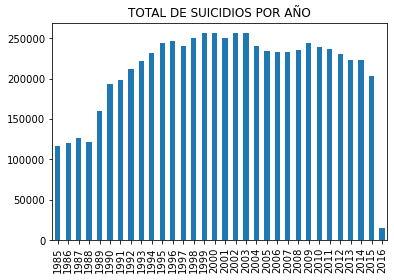

In [48]:
suicidios_años= pd.DataFrame(suicidios_limpieza['AÑO'])
suicidios_años.insert(1,'NUM_SUICIDIOS',suicidios_limpieza['NUM_SUICIDIOS'])
datos_totalsuicidios= pd.Series()


for i in range(0,32):  
    suicidios_poraño=suicidios_años["AÑO"]==1985+int(i)
    registros_poraño=suicidios_años[suicidios_poraño]
    total_suicidios_poraño=registros_poraño['NUM_SUICIDIOS'].sum() 
    datos_totalsuicidios=datos_totalsuicidios.append(pd.Series(total_suicidios_poraño,index=[1985+int(i)])) 

graficobarra=datos_totalsuicidios
graficobarra.plot.bar(title='TOTAL DE SUICIDIOS POR AÑO')

__Conclusión:__
Se percibe fácilmente los incrementos y disminuciones a través del tiempo. Además, permite visualizar que existen 4 años (1999,2000,2002,2003) con un mayor número de suicidios.

## Gráfico Interactivo de Línea
_Gráfico de línea interactivo del número de suicidios por año de 1985 al 2016._ 

In [49]:
import plotly.express as pl
grafico_totalsuicidios=pl.line(datos_totalsuicidios,
                               x=datos_totalsuicidios.index.values.tolist(),
                               y=datos_totalsuicidios.values.tolist(),title="NÚMERO DE SUICIDIOS POR AÑO")
grafico_totalsuicidios.show()

__Conclusión:__
Gracias a la interacción es posible conocer fácilmente los incrementos y disminuciones a través del tiempo conociendo las cifras del total de suicidios por año. Así mismo, visualizar que de los 4 años con mayor número de incidentes, el año de 1999 es el año con mayor incremento de suicidios en entre 1985 al 2016.

## Gráfico de Línea Interactivo
_Gráfica de línea Interactivo de la cantidad de suicidios por país del año con mayor suicidios registrados entre 1985 al 2016._


    En base a la gráfica de barras, se puede observar a simple vista que existen 4 años (1999,2000,2002,2003) en los que existió una mayor cantidad de suicidios. Se realizó un proceso para determinar cuál de los 4 años es el que cuenta con más suicidios, para después poder determinar el país con mayor número de suicidios en el año.

In [50]:
PARTICION=datos_totalsuicidios.iloc[14:19]
mayor=0
for año in range(len(PARTICION)):
    menor=PARTICION.values[año]
    if menor>mayor:
        AÑO=PARTICION.index.values[año]
        mayor=menor
print('El año con mayor número de suicidios en el tiempo es:\t el año de',AÑO,'con un total de',mayor, "suicidios.")

El año con mayor número de suicidios en el tiempo es:	 el año de 1999 con un total de 256119 suicidios.


__¿Qué países son los que no aparecen en 1999?__

En 1999 hay 83 de los 101 presentes en base de datos.

PAIS NO REGISTRADO EN 1999:  Barbados
PAIS NO REGISTRADO EN 1999:  Dominica
PAIS NO REGISTRADO EN 1999:  Grenada
PAIS NO REGISTRADO EN 1999:  Jamaica
PAIS NO REGISTRADO EN 1999:  Seychelles
PAIS NO REGISTRADO EN 1999:  Saint Kitts and Nevis
PAIS NO REGISTRADO EN 1999:  Macau
PAIS NO REGISTRADO EN 1999:  Qatar
PAIS NO REGISTRADO EN 1999:  Maldives
PAIS NO REGISTRADO EN 1999:  Montenegro
PAIS NO REGISTRADO EN 1999:  Fiji
PAIS NO REGISTRADO EN 1999:  United Arab Emirates
PAIS NO REGISTRADO EN 1999:  Oman
PAIS NO REGISTRADO EN 1999:  Turkey
PAIS NO REGISTRADO EN 1999:  Nicaragua
PAIS NO REGISTRADO EN 1999:  Bosnia and Herzegovina
PAIS NO REGISTRADO EN 1999:  Cabo Verde
PAIS NO REGISTRADO EN 1999:  Mongolia


<ipython-input-51-c74953128793>:12: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



<AxesSubplot:title={'center':'1999 AÑO CON MAYOR NÚMERO DE SUICIDIOS'}>

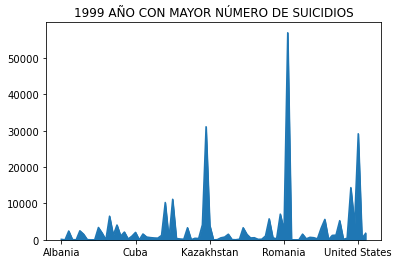

In [51]:
suicidios_1999=suicidios_limpieza['AÑO']==1999
registros_1999=suicidios_limpieza[suicidios_1999]
paises_1999=list(registros_1999['PAIS'].unique())

paises_totales=list(suicidios_limpieza['PAIS'].unique())

paises_no_registrados1999=list()
for i in range(len(paises_totales)):
    if paises_totales[i] not in paises_1999:
        print('PAIS NO REGISTRADO EN 1999: ',paises_totales[i])
        paises_no_registrados1999.append(paises_totales[i])
datos_totalsuicidios_1999_ppais=pd.Series()
for i in range(len(paises_1999)):  
    suicidios_1999_ppais=registros_1999["PAIS"]==paises_1999[i]
    registros_1999_ppais=registros_1999[suicidios_1999_ppais] 
    total_registros_1999_ppais=registros_1999_ppais['NUM_SUICIDIOS'].sum() 
    datos_totalsuicidios_1999_ppais=datos_totalsuicidios_1999_ppais.append(pd.Series(total_registros_1999_ppais,index=[paises_1999[i]]))
    
grafico_totalsuicidios_1999=pl.line(datos_totalsuicidios_1999_ppais,
                               x=datos_totalsuicidios_1999_ppais.index.values.tolist(),
                               y=datos_totalsuicidios_1999_ppais.values.tolist(), title="1999 AÑO CON MAYOR NÚMERO DE SUICIDIOS")
grafico_totalsuicidios_1999.show()

grafico_linea=datos_totalsuicidios_1999_ppais
grafico_linea.plot.area(title="1999 AÑO CON MAYOR NÚMERO DE SUICIDIOS")

__Conclusión:__ La gráfica interactiva nos permite determinar que el país en el año de 1999 con mayor número de suicidios es la Federación Rusa.

## Gráfico de Líneas Interactivo
_Gráfico de líneas interactivo de la cantidad de suicidios ocurridos en la Federación Rusa a través de los años de 1985 al 2016._

    Del gráfico anterior se obtuvo que el país que tuvo más suicidios en el año de 1999 es la Federación Rusa, por lo tanto, se realizó un gráfico de línea interactivo donde se puede observar el número de suicidios ocurridos a través del tiempo en la Federación Rusa.

In [52]:
suicidios_federacion_rusa=suicidios_limpieza["PAIS"]=='Russian Federation'
registros_federacion_rusa=suicidios_limpieza[suicidios_federacion_rusa] 
datos_totalsuicidios_federacion= pd.Series()
datos_totalpoblacion_federacion= pd.Series()

for i in range(0,32):  

    registros_federacion_poraño=registros_federacion_rusa["AÑO"]==1985+int(i)
    registros_poraño_federacion=registros_federacion_rusa[registros_federacion_poraño] 
    total_suicidios_poraño_federacion=registros_poraño_federacion['NUM_SUICIDIOS'].sum()
    datos_totalsuicidios_federacion=datos_totalsuicidios_federacion.append(pd.Series(total_suicidios_poraño_federacion,index=[1985+int(i)]))
    total_poblacion_poraño_federacion=registros_poraño_federacion['POBLACION'].sum()
    datos_totalpoblacion_federacion=datos_totalpoblacion_federacion.append(pd.Series(total_poblacion_poraño_federacion,index=[1985+int(i)]))
    
grafico_linea_federacion=pl.line(datos_totalsuicidios_federacion,
                               x=datos_totalsuicidios_federacion.index.values.tolist(),
                               y=datos_totalsuicidios_federacion.values.tolist(),title='NÚMERO DE SUICIDIOS, FEDERACION RUSA')
grafico_linea_federacion.show()

<ipython-input-52-34dc6571b740>:3: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-52-34dc6571b740>:4: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



__Conclusión:__
Gráfico de la Federación Rusa mostrando que el año de 1994 fue el año con más suicidios, lo cual podría indicar que en aquel año pudo existir algún suceso que pudo ser factor a considerar por estos sucesos.

## Scatter Plot

_Scatter Plot de la relación entre el número de suicidios y el PIB de la Federación Rusa._

    A partir de la información obtenida del país con mayor número de suicidios en el año 1999, el cuál es el año con mayor número de suicidios en el intervalo de 1985 al 2016, se realiza el gráfico para determinar si el Producto Interno Bruto del país está relacionado con la cantidad de suicidios del mismo.

<AxesSubplot:title={'center':'PIB-No.Suicidios'}, xlabel='PIB', ylabel='0'>

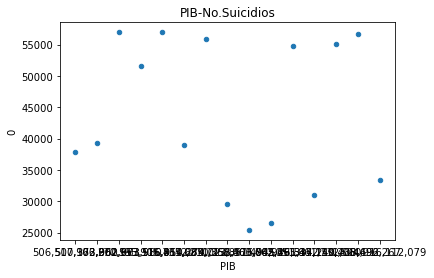

In [53]:
suicidios_años_federacion=datos_totalsuicidios_federacion.iloc[4:31]
pip_federacion=registros_federacion_rusa['PIB'].unique()
grafico_scatter1=pd.DataFrame(suicidios_años_federacion)

grafico_scatter1.insert(1,'PIB',pip_federacion)
grafico_scatter1.sample(15).plot.scatter(x='PIB',y=0,title="PIB-No.Suicidios")

__Conclusión:__ No se observa una relación entre el Producto Interno Bruto y la cantidad de suicidios registrados en la Federación Rusa. 

## Hex plot 

_Hex Plot de la relación entre el número de suicidios y el PIB de la Federación Rusa._ 

<AxesSubplot:xlabel='0', ylabel='0'>

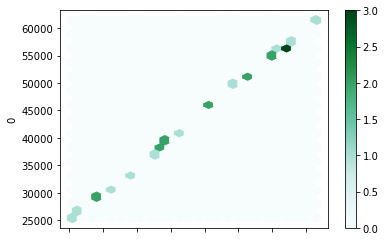

In [54]:
grafico_scatter1.sample(25).plot.hexbin(x=0,y=0, gridsize=25)

__Conclusión:__ La gráfica no muestra una relación entre el producto interno bruto y el número de suicidios.

## Scatter Plot 

_Scatter Plot de la relación entre cantidad de suicidios registrados en la Federación Rusa y el nivel de población del país._

    A partir de la información obtenida del país con mayor número de suicidios en el año 1999, el cuál es el año con mayor número de suicidios en el intervalo de 1985 al 2016, se realiza el gráfico para determinar si el nivel de población del país está relacionado con la cantidad de suicidios del mismo.

<AxesSubplot:title={'center':'Población-No.Suicidios'}, xlabel='POBLACION', ylabel='0'>

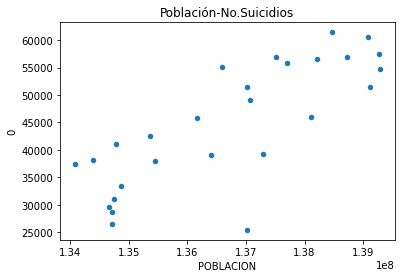

In [55]:
poblacion_años_federacion=datos_totalpoblacion_federacion.iloc[4:31]
grafico_scatter2=pd.DataFrame(suicidios_años_federacion)
grafico_scatter2.insert(1,'POBLACION',poblacion_años_federacion)
grafico_scatter2.plot.scatter(x='POBLACION',y=0, title="Población-No.Suicidios")

__Conclusión:__ No existe una relación directa entre la población y el número de suicidios registrados en la base de datos.

## Hex plot
_Hex Plot de la relación entre el número de suicidios y la población de la Federación Rusa._

<AxesSubplot:xlabel='0', ylabel='0'>

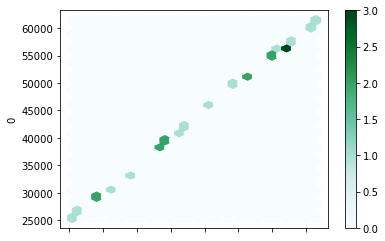

In [56]:
grafico_scatter2.sample(25).plot.hexbin(x=0,y=0, gridsize=25)

__Conclusión:__ No se muestra relación entre ambas variables.

## Gráfico Pairplot
_Gráfica Pairplot de relación entre el Número de Suicidios, los años, la población y los suicidios por cada 100K de la Federación Rusa._

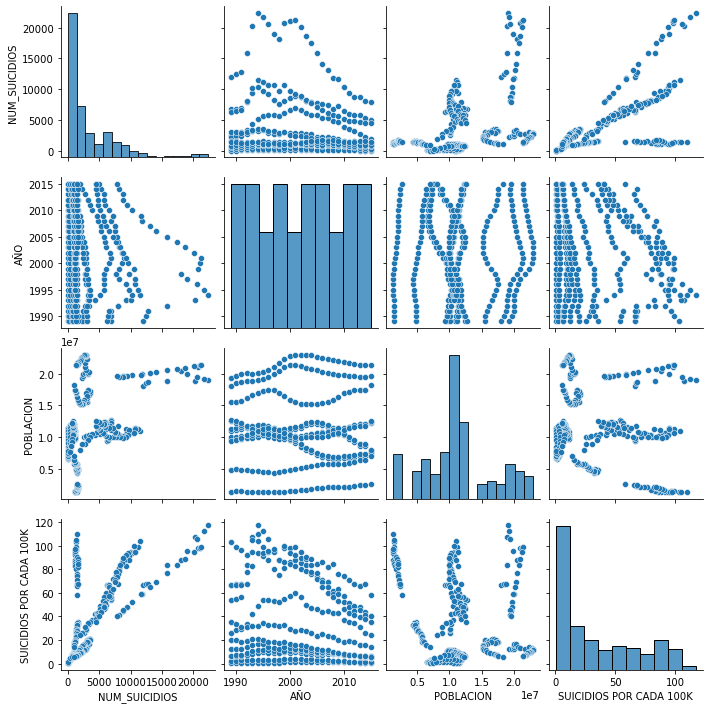

In [57]:
graficapairplot=registros_federacion_rusa[['NUM_SUICIDIOS','AÑO','POBLACION','SUICIDIOS POR CADA 100K']]

sbs.pairplot(graficapairplot)

__Conclusión:__ Si bien una gráfica pairplot nos muestra gráficas comparativas entre varios datos, para fines del tema que estamos tratando no todas son útiles, por lo tanto, las conclusiones se irán haciendo de las comparativas que parezcan más pertinentes. 
- Primero destacando la gráfica de número de suicidios por año, podemos observar que en la federación Rusa los años con más suicidios se encuentran en la segunda mitad de la década de los 90’s y la primer mitad de los años 2000.
- También podemos observar en la gráfica de número de suicidios con respecto a la población que la media de suicidios es de 1, habiendo claro sus excepciones. 
- Otra gráfica que es importante resaltar es la de número de suicidios con respecto a los suicidios por cada 100k, ya que al parecer se tiene una tendencia a la alza. 

## Heatmap
_Gráfica de correlación entre el número de suicidios, los años, la población y los suicidios por cada 100K._

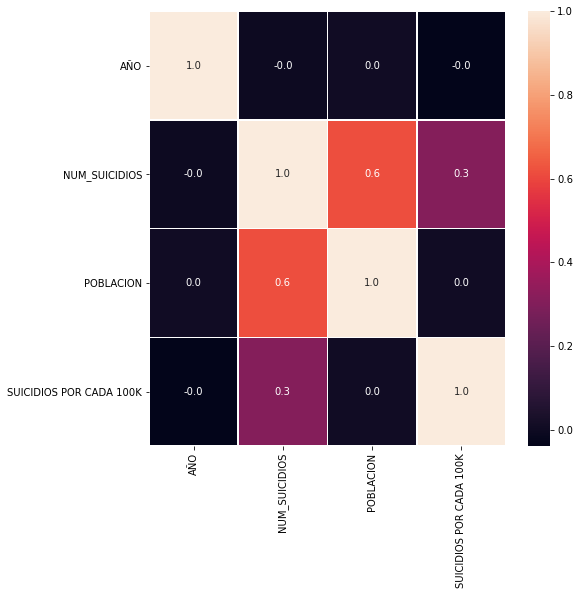

In [58]:
f,ax=plt.subplots(figsize = (8,8))
sbs.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

__Conclusión:__ Muestra la correlación que existe entre las variables más destacables de la base de datos y el índice de relación  que existe entre ellas.

## Histograma

_Histograma de la frecuencia de incidentes cada año._

<AxesSubplot:title={'center':'Cantidad de suicidios por intervalo de años'}, ylabel='Frequency'>

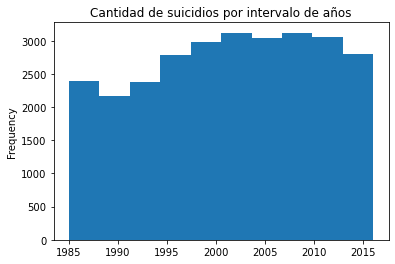

In [59]:
suicidios_limpieza['AÑO'].plot.hist(title="Cantidad de suicidios por intervalo de años")

__Conclusión:__ Se puede observar un incremento en la cantidad de suicidios entre los años 1995 al 2000, esto puede deberse a la crisis económica que existió entre varios países en el año de 1998. Otra gran cantidad de incidentes entre los años 2005-2010 podría tener como causa la gran depresión que existió en el mundo entre los años de 2007 al 2009.

## Graficas de Distancia
_Gráfica de distancia de la frecuencia de suicidios cometidos por intervalos de años._

C:\Users\almag\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='AÑO'>

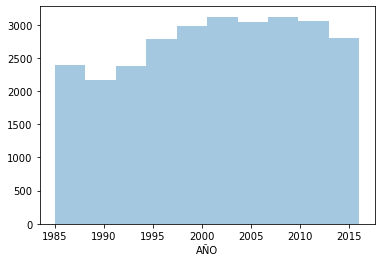

In [60]:
sbs.distplot(suicidios_limpieza['AÑO'], bins=10, kde=False)

__Conclusión:__ En este gráfico se puede observar los años con mayor frecuencia de suicidios está entre el intervalo del 2000 al 2003 y entre el 2008 y el 2010, pudiendo compartir como causas, las crisis mencionadas en el histograma.

## Lmplot
_Gráfico de regresión sobre la cantidad de suicidios ya sea femeninos o masculinos según la población._

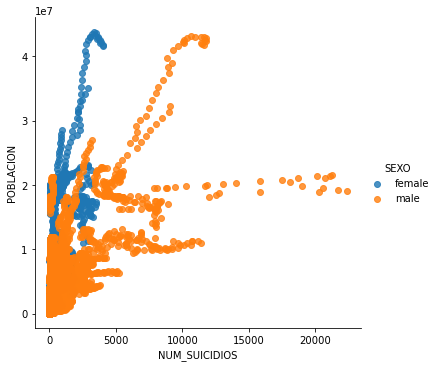

In [61]:
import matplotlib.pyplot as plt
sbs.lmplot(x='NUM_SUICIDIOS',y='POBLACION',hue="SEXO",data=suicidios_limpieza[suicidios_limpieza['SEXO'].isin(['female','male'])],fit_reg=False)

__Conclusión:__ La mayor cantidad de incidentes provienen del género masculino.

## Stacked Plot Interactivo
_Stacked Plot Interactivo del total de suicidios por intervalo de edad según el sexo del individuo._

In [62]:
lista_intervalos_edades=list(suicidios_limpieza['EDAD'].unique())
datos_totalregistros_porintervalo=pd.Series()
datos_totalregistros_porintervalo_genero1=pd.Series()
datos_totalregistros_porintervalo_genero2=pd.Series()

for i in range(0,len(lista_intervalos_edades)):  
    suicidios_porintervalo=suicidios_limpieza["EDAD"]==lista_intervalos_edades[i]
    registros_porintervalo=suicidios_limpieza[suicidios_porintervalo] 
    total_suicidios_porintervalo=registros_porintervalo['NUM_SUICIDIOS'].sum() 
    datos_totalregistros_porintervalo=datos_totalregistros_porintervalo.append(pd.Series(total_suicidios_porintervalo,index=[lista_intervalos_edades[i]]))

    suicidios_porintervalo_genero1=registros_porintervalo["SEXO"]=='female'
    suicidios_porintervalo_genero2=registros_porintervalo["SEXO"]=='male'
    
    registros_porintervalo_genero1=registros_porintervalo[suicidios_porintervalo_genero1]
    registros_porintervalo_genero2=registros_porintervalo[suicidios_porintervalo_genero2]

    
    total_suicidios_porintervalo_genero1=registros_porintervalo_genero1['NUM_SUICIDIOS'].sum()
    total_suicidios_porintervalo_genero2=registros_porintervalo_genero2['NUM_SUICIDIOS'].sum()
    
    datos_totalregistros_porintervalo_genero1=datos_totalregistros_porintervalo_genero1.append(pd.Series(total_suicidios_porintervalo_genero1,index=[lista_intervalos_edades[i]]))
    datos_totalregistros_porintervalo_genero2=datos_totalregistros_porintervalo_genero2.append(pd.Series(total_suicidios_porintervalo_genero2,index=[lista_intervalos_edades[i]]))

<ipython-input-62-542c5e8c2190>:2: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-62-542c5e8c2190>:3: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-62-542c5e8c2190>:4: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [63]:
datos_H_M=datos_H_M={'FEMENINO':datos_totalregistros_porintervalo_genero1,'MASCULINO':datos_totalregistros_porintervalo_genero2}
datos_H_M=pd.DataFrame(datos_H_M)

grafico_stackedplot=pl.bar(datos_H_M.T,title='SUICIDIOS TOTALES POR INTERVALO DE EDAD')
grafico_stackedplot.show()

grafico_stackedplotarea=pl.area(datos_H_M.T,title='SUICIDIOS TOTALES POR INTERVALO DE EDAD')
grafico_stackedplotarea.show()

grafico_stackedplotline=pl.line(datos_H_M.T,title='SUICIDIOS TOTALES POR INTERVALO DE EDAD')
grafico_stackedplotline.show()

__Conclusión:__ El género con mayor índice de suicidios es en el masculino entre las edades de 31 a 54 años de edad.

## Gráfico Interactivo de Barras
_Gráfico interactivo de barras del total de suicidios por intervalos de edad en los años de 1985 al 2016._

In [64]:
grafico_barra_intervalos=pl.bar(datos_totalregistros_porintervalo,title='SUICIDIOS TOTALES POR INTERVALO DE EDAD')
grafico_barra_intervalos.show()

__Conclusión:__ El intervalo de edad con mayor índice de suicidios es entre los 35 y los 54 años.

## Gráfico KDE
_Gráfica de la función de densidad de probabilidad de cometer suicidio según los datos obtenidos._

    A partir de los datos obtenidos del número total de suicidios a través del tiempo, se graficó la función de densidad de probabilidad para visualizar cómo se comportan los datos.

<AxesSubplot:ylabel='Density'>

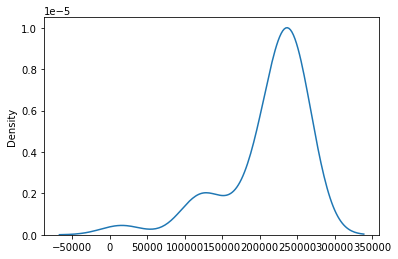

In [65]:
sbs.kdeplot(datos_totalsuicidios)

   __Conclusión:__ A lo largo de la historia han existido una gran cantidad de suicidios, aquí se muestra la probabilidad con la que ha sucedido esto, y se nos muestra que hay un pico de probabilidad en que los suicidios lleguen a ser 200,000 y 250,000.

## Blox Plot y Gráfica de Violín

_Box Plot y gráfica de violín del total de suicidios entre 1985 al 2016._

<ipython-input-66-9394c46985fe>:2: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\almag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

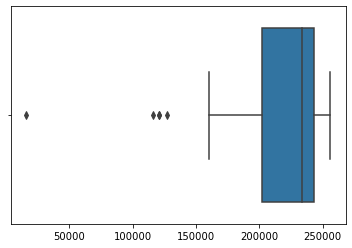

In [66]:
generaciones=list(suicidios_limpieza['GENERACION'].unique())
datos_totalgeneraciones=pd.Series()
for i in range(len(generaciones)):  
    suicidios_generaciones=suicidios_limpieza["GENERACION"]==generaciones[i]
    registros_generaciones=suicidios_limpieza[suicidios_generaciones] 
    total_registros_generaciones=registros_generaciones['NUM_SUICIDIOS'].sum() 
    datos_totalgeneraciones=datos_totalgeneraciones.append(pd.Series(total_registros_generaciones,index=[generaciones[i]]))
    
    if generaciones[i]=='Generation X':
        serie1=pd.Series(registros_generaciones['NUM_SUICIDIOS'])
    elif generaciones[i]=='Boomers':
        serie2=pd.Series(registros_generaciones['NUM_SUICIDIOS'])
    elif generaciones[i]=='Silent':
        serie3=pd.Series(registros_generaciones['NUM_SUICIDIOS'])
    elif generaciones[i]=='G.I. Generation':
        serie4=pd.Series(registros_generaciones['NUM_SUICIDIOS'])
    elif generaciones[i]=='Millenials':
        serie5=pd.Series(registros_generaciones['NUM_SUICIDIOS'])
    elif generaciones[i]=='Generation Z':
        serie6=pd.Series(registros_generaciones['NUM_SUICIDIOS'])
        
import seaborn as sbs
sbs.boxplot(datos_totalsuicidios)

C:\Users\almag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

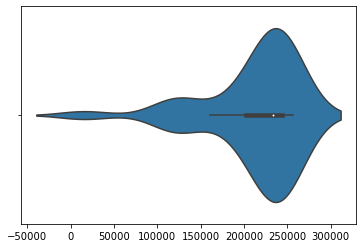

In [68]:
sbs.violinplot(datos_totalsuicidios)

__Conclusión:__ Se puede apreciar datos atípicos menores. Además, el rango donde está la mayoría de los datos del total de suicidios de entre 1985 al 2016 se encuentra entre 150,000 y 250,000. Así mismo, se tiene una media de aproximadamente de 240,000 y se tiene una mayor frecuencia de datos entre 200,000 y 240,000.

## Jointplot
_Jointplot de la relación entre los años y las generaciones registradas en la base de datos._

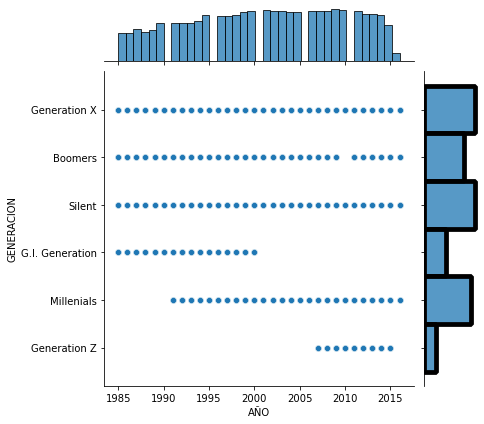

In [69]:
sbs.jointplot(x='AÑO',y='GENERACION', data=suicidios_limpieza)

__Conclusión:__ El scatter plot nos ayuda a visualizar los años en los que estuvo presente cada generación, por ejemplo, los registros marcan que la generación G.I esta de 1985 al 2000. Por el otro lado, la generación con mayor frecuencia de registros es la generación X. Por último, muestra un histograma múltiple de la cantidad de registros de cada año registrado.

## Gráfica Countplot
_Gráfica Countplot de la cantidad de observaciones que existen de cada generación._

    Gráfica la cantidad de veces que está registrada cada generación en la base de datos.

C:\Users\almag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='GENERACION', ylabel='count'>

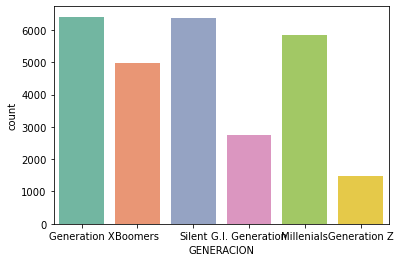

In [70]:
import seaborn as sbs
sbs.countplot(suicidios_limpieza['GENERACION'],palette="Set2")

__Conclusión:__ Las generaciones con mayor frecuencia son la Generacipon X, Generación Silent, y los Millenials.

# PUNTOS EXTRA
## 1. Gráfica de pastel
_Gráfica de pastel del porcentaje de suicidios por generación._

    Dada la gráfica de countplot se buscó encontrar el porcentaje de suicidios de cada una de las generaciones para conocer en cuál se obtuvo un mayor número de suicidios registrados en la base de datos.

<AxesSubplot:title={'center':'PORCENTAJE DE SUICIDIOS POR GENERACIÓN'}, ylabel='None'>

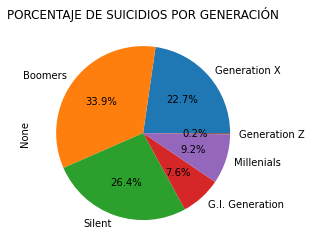

In [71]:
grafico_generaciones_pastel=datos_totalgeneraciones
grafico_generaciones_pastel.plot.pie(autopct='%1.1f%%',title='PORCENTAJE DE SUICIDIOS POR GENERACIÓN')

__Conclusión:__ Las tres generaciones con mayor índice de suicidios fueron la Boomer, la Silent y la Generación X.

## Histograma Múlti-variable
_Histograma de las generaciones Boomers y Silent, generaciones con mayor número de suicidios._

Text(0.5, 1.0, 'Histograma Boomers y Silent')

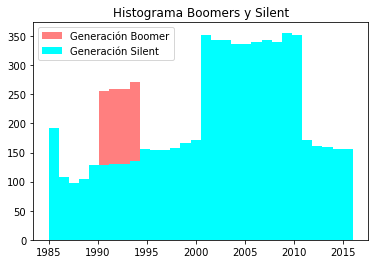

In [72]:
boomers=plt.hist(suicidios_limpieza[suicidios_limpieza["GENERACION"] == "Boomers"].AÑO,bins=30,fc = (1,0,0,0.5), label='Generación Boomer')
silent=plt.hist(suicidios_limpieza[suicidios_limpieza["GENERACION"] == "Silent"].AÑO,bins=30,fc = (0,1,1,1), label='Generación Silent')
plt.legend()
plt.title("Histograma Boomers y Silent")

__Conclusión:__ 